In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('train images shape :',train_images.shape)
print('train lables shape :',train_labels.shape)
print('test images shape :',test_images.shape)
print('test lables shape :',test_labels.shape)

train images shape : (60000, 28, 28)
train lables shape : (60000,)
test images shape : (10000, 28, 28)
test lables shape : (10000,)


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

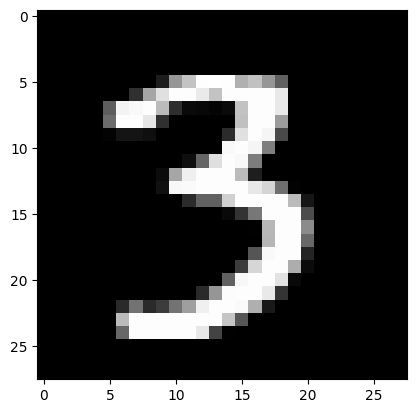

In [ ]:
plt.imshow(train_images[10000], cmap="grey")
plt.show()

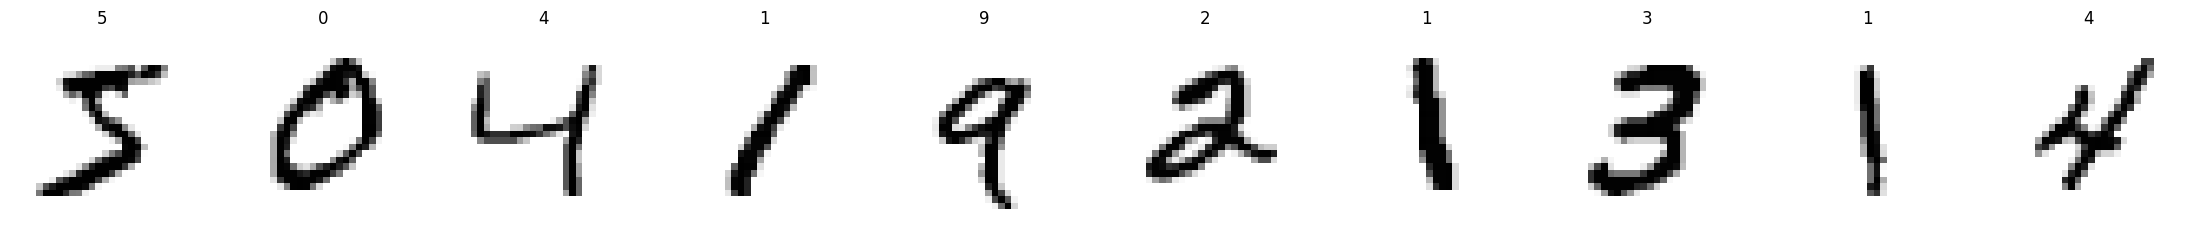

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(28,28))

for i in range(10):
    axes[i].set_axis_off()
    axes[i].imshow(train_images[i], cmap='binary')
    axes[i].set_title(train_labels[i])

In [ ]:
len(set(list(test_labels)))

10

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()

#  Input Layer
network.add(layers.Flatten(input_shape=(28,28)))

network.add(layers.Dense(512, activation='relu', input_shape=(28,28)))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
network.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model.keras', verbose=1)
]

In [ ]:
from keras.utils import to_categorical

train_images/255
test_images/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
history = network.fit(train_images, train_labels,callbacks=my_callbacks, epochs=10,batch_size=128)

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
#plotting the loss graph
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
#plotting the accuracy graph
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.legend(['training' , 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Predictions

In [ ]:
import os

# Example test image index
i = 762

# Check if the model file exists
model_path = 'model.keras'  # or 'model.h5', depending on your actual file
if not os.path.exists(model_path):
    print(f"The file '{model_path}' does not exist in the current directory.")
    print("Files in the current directory:", os.listdir('.'))
else:
    # Load the model
    model = keras.models.load_model(model_path)
    # Assuming 'test_images' is already loaded in your environment:
    output = model.predict(test_images[i].reshape(1, 28, 28))
    plt.imshow(test_images[i], cmap='binary')
    plt.show()
    print("The model predicted a", np.argmax(output))


